# Pymaceuticals Inc.

### Analysis
- Observed Trend 1: In the analysis of the four drugs: Capomulin, Infubinol, Ketapril, and Placebo; we can observe that Carpolium is the most effective one. Having the highest rate of survival and also the most effective in terms of reducing the volume of the tumor (19.48%) over the 45 days of the study.
- Observed Trend 2: The other 3 drugs analyzed (Infubinol, Ketapril, and Placebo), does not seem to cause a positive outcome. The tumor keep growing and the survival rate of the mouses are around 10%. 
- Observed Trend 3: Even though Capomulin did not cure the mice it definitely performed better than the other 3 drugs analyzed.

In [1]:
# Importing Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

In [2]:
# Reading the files
clinical_data = "raw_data/clinicaltrial_data.csv"
clinical_data_df = pd.read_csv(clinical_data)
#clinical_data_df.head()

mouse_data = "raw_data/mouse_drug_data.csv"
mouse_data_df = pd.read_csv(mouse_data)
#mouse_data_df.head()

In [3]:
# Concatenating both tables mouse_data_df and clinical_data_df
clinic_mouse_merge = pd.merge(clinical_data_df, mouse_data_df, on="Mouse ID", how="outer")
clinic_mouse_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [4]:
#Selecting the drugs we are going to analyze: (Capomulin, Infubinol, Ketapril, and Placebo)
clinic_mouse_analysis = clinic_mouse_merge.loc[(clinic_mouse_merge["Drug"]=="Capomulin") | (
    clinic_mouse_merge["Drug"]=="Infubinol") | (
    clinic_mouse_merge["Drug"]=="Ketapril") | (
    clinic_mouse_merge["Drug"]=="Placebo")]
#clinic_mouse_analysis

### Tumor Response to Treatment

In [5]:
# Grouping the merged table into Drug and Timepoint
grouped_drug_time = clinic_mouse_merge.groupby(['Drug', 'Timepoint'])
grouped_drug_time.count().head()

Mouse ID  Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                                
Capomulin 0                25                  25                25
          5                25                  25                25
          10               25                  25                25
          15               24                  24                24
          20               23                  23                23

In [6]:
# Calculating the average size of the tumor per drug and timepoint.
tumor_vol_avrg = grouped_drug_time["Tumor Volume (mm3)"].mean()
#tumor_vol_avrg

# Reset the index and covert it into a dataframe
tumor_vol_df = tumor_vol_avrg.reset_index(level=['Drug','Timepoint'])
#tumor_vol_df.head()

# Make a pivot table
tumor_pivot = tumor_vol_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tumor_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


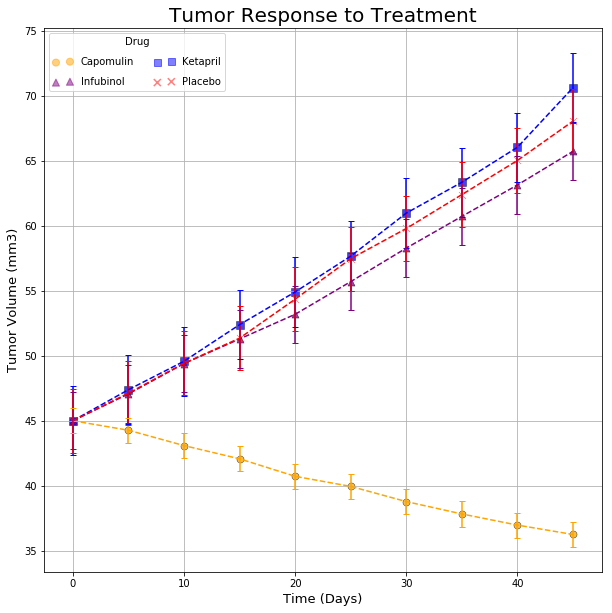

In [80]:
#Selecting the drugs we are going to analyze: (Capomulin, Infubinol, Ketapril, and Placebo)
tumor_pivot_analysis = tumor_pivot.loc[:,["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
#tumor_pivot_analysis


marker = [u"o", u"^", u"s", u"x", u"8", u"p", u"h", u"*", u"3", u"4"]
colors = ["orange", "purple", "blue", "red"]
x_axis = tumor_pivot_analysis.index

plt.figure(figsize=(10,10))
plt.grid(True)

# Creating the legend for the graph
c = 0
for i in tumor_pivot_analysis.columns:
    plt.scatter([],[], c=colors[c], alpha=0.5, s=50, linewidths=1, label=i, linestyle='solid', marker=marker[c])
    c +=1
plt.legend(scatterpoints=2, labelspacing=1, title='Drug', ncol=2)

# Creating the scatterplot
c = 0
# for a in tumor_pivot_analysis.index:
for a in tumor_pivot_analysis.columns:
    # Plotting the tumor volume for every drug in a determined timepoint
    y_axis = tumor_pivot_analysis.values[:,c]
    plt.scatter(x_axis, y_axis, marker=marker[c], linewidth=0.5, label=a, edgecolors="black", alpha=0.75, c=colors[c], s=50)
    
    # Set error bars
    y_axis = tumor_pivot_analysis.values[:,c]
    standard_errors = sem(tumor_pivot_analysis.values[:,c])
    #plt.errorbar(x_axis, y_axis, standard_errors, linestyle='None', capsize=3, c=colors[c])   
    plt.errorbar(x_axis, y_axis, standard_errors, linestyle='--', capsize=3, c=colors[c])  
    c +=1
    
# Set the Titles
plt.title("Tumor Response to Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=13)
plt.ylabel("Tumor Volume (mm3)", fontsize=13)
c = 0
plt.savefig("Images/Tumor_Response_to_Treatment.png")

### Metastatic Response to Treatment

In [8]:
# From the group table we will get the mean of "Metastatic Sites"
tumor_met_avrg = grouped_drug_time["Metastatic Sites"].mean()
#tumor_met_avrg
tumor_met_df = tumor_met_avrg.reset_index(level=['Drug','Timepoint'])
tumor_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
metastatic_pivot = tumor_met_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
metastatic_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


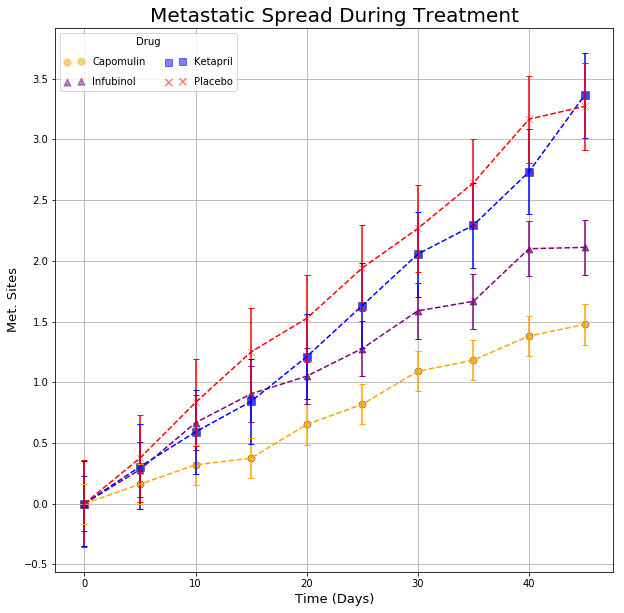

In [81]:
#Selecting the drugs we are going to analyze: (Capomulin, Infubinol, Ketapril, and Placebo)
metastatic_pivot_analysis = metastatic_pivot.loc[:,["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
#tumor_pivot_analysis


marker = [u"o", u"^", u"s", u"x", u"8", u"p", u"h", u"*", u"3", u"4"]
colors = ["orange", "purple", "blue", "red"]
x_axis = metastatic_pivot_analysis.index

plt.figure(figsize=(10,10))
plt.grid(True)

# Creating the legend for the graph
c = 0
for i in metastatic_pivot_analysis.columns:
    plt.scatter([],[], c=colors[c], alpha=0.5, s=50, linewidths=1, label=i, linestyle='solid', marker=marker[c])
    c +=1
plt.legend(scatterpoints=2, labelspacing=1, title='Drug', ncol=2)

# Creating the scatterplot
c = 0
# for a in tumor_pivot_analysis.index:
for a in metastatic_pivot_analysis.columns:
    # Plotting the tumor volume for every drug in a determined timepoint
    y_axis = metastatic_pivot_analysis.values[:,c]
    plt.scatter(x_axis, y_axis, marker=marker[c], linewidth=0.5, label=a, edgecolors="black", alpha=0.75, c=colors[c], s=50)
    
    # Set error bars
    y_axis = metastatic_pivot_analysis.values[:,c]
    standard_errors = sem(metastatic_pivot_analysis.values[:,c])
    #plt.errorbar(x_axis, y_axis, standard_errors, linestyle='None', capsize=3, c=colors[c])   
    plt.errorbar(x_axis, y_axis, standard_errors, linestyle='--', capsize=3, c=colors[c])  
    c +=1
    
# Set the Titles
plt.title("Metastatic Spread During Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=13)
plt.ylabel("Met. Sites", fontsize=13)
c = 0
plt.savefig("Images/Metastatic_Spread_During_Treatment.png")

### Survival Rates

In [11]:
# From the group table we will get the mean of "Metastatic Sites"
surv_rate = grouped_drug_time["Mouse ID"].count()

# Renaming the series
surv_rate = surv_rate.rename("Mouse Count")

surv_rate_df = surv_rate.reset_index(level=['Drug','Timepoint'])
surv_rate_df.head()

#Creating the pivot table
survival_pivot = surv_rate_df.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
survival_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


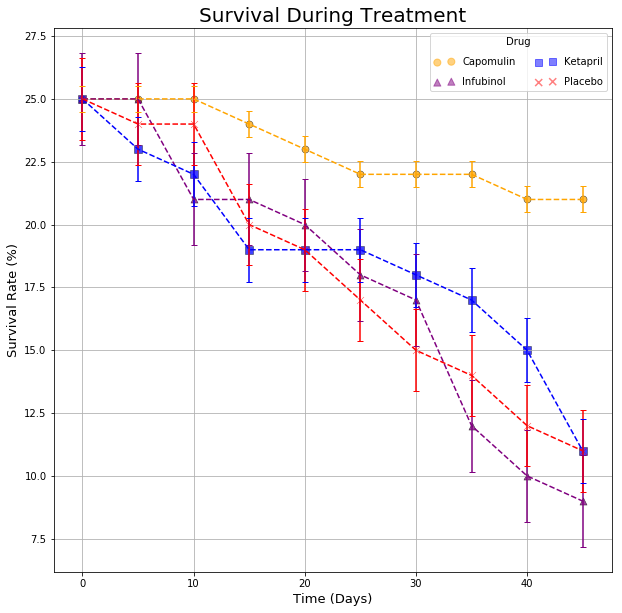

In [82]:
#Selecting the drugs we are going to analyze: (Capomulin, Infubinol, Ketapril, and Placebo)
survival_pivot_analysis = survival_pivot.loc[:,["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
#tumor_pivot_analysis


marker = [u"o", u"^", u"s", u"x", u"8", u"p", u"h", u"*", u"3", u"4"]
colors = ["orange", "purple", "blue", "red"]
x_axis = survival_pivot_analysis.index

plt.figure(figsize=(10,10))
plt.grid(True)

# Creating the legend for the graph
c = 0
for i in survival_pivot_analysis.columns:
    plt.scatter([],[], c=colors[c], alpha=0.5, s=50, linewidths=1, label=i, linestyle='solid', marker=marker[c])
    c +=1
plt.legend(scatterpoints=2, labelspacing=1, title='Drug', ncol=2)

# Creating the scatterplot
c = 0
# for a in survival_pivot_analysis.index:
for a in survival_pivot_analysis.columns:
    # Plotting the tumor volume for every drug in a determined timepoint
    y_axis = survival_pivot_analysis.values[:,c]
    plt.scatter(x_axis, y_axis, marker=marker[c], linewidth=0.5, label=a, edgecolors="black", alpha=0.75, c=colors[c], s=50)
    
    # Set error bars
    y_axis = survival_pivot_analysis.values[:,c]
    standard_errors = sem(survival_pivot_analysis.values[:,c])
    #plt.errorbar(x_axis, y_axis, standard_errors, linestyle='None', capsize=3, c=colors[c])   
    plt.errorbar(x_axis, y_axis, standard_errors, linestyle='--', capsize=3, c=colors[c])  
    c +=1
    
# Set the Titles
plt.title("Survival During Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=13)
plt.ylabel("Survival Rate (%)", fontsize=13)
c = 0
plt.savefig("Images/Survival_During_Treatment.png")

### Summary Bar Graph

In [13]:
# Calculating the % Tumor Change for each drug across the full 45 days
tumor_chg = []
colum_drug = []
c = 0
for i in tumor_pivot_analysis.columns:
    first_val = tumor_pivot_analysis.values[0,c]
    last_val = tumor_pivot_analysis.values[9,c]
    tum_chg = round(((last_val - first_val)/first_val)*100,2)
#     print(first_val)
#     print(last_val)
    print(tum_chg)
    tumor_chg.append(tum_chg)
    colum_drug.append(i)
    c+=1

-19.48
46.12
57.03
51.3


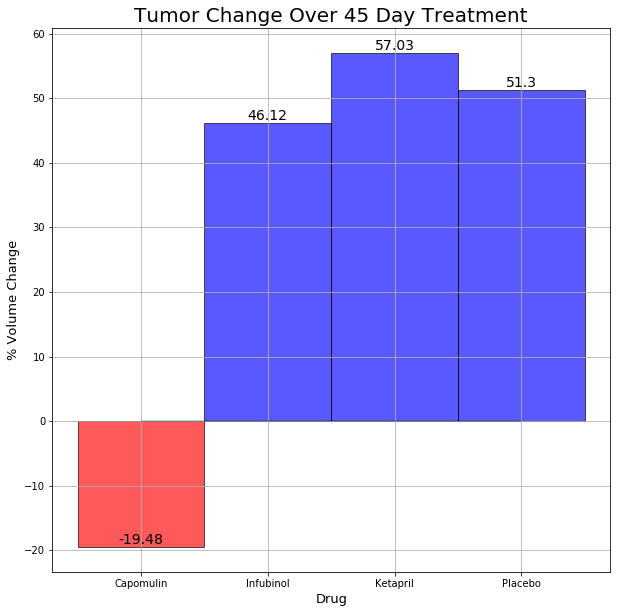

In [83]:
plt.figure(figsize=(10,10))
plt.hlines(0, 0, 3, alpha=0.25)
plt.grid(True)

c=0
for i in tumor_pivot_analysis.columns:
    if tumor_chg[c]>0:
        plt.bar(colum_drug[c], tumor_chg[c], color='b', width=1, edgecolor="black", linewidth=1, alpha=0.65, align="center")
    if tumor_chg[c]<0:
        plt.bar(colum_drug[c], tumor_chg[c], color='r', width=1, edgecolor="black", linewidth=1,  alpha=0.65, align="center")
    
    c+=1

# Set the Titles
plt.title("Tumor Change Over 45 Day Treatment", fontsize=20)
plt.xlabel("Drug", fontsize=13)
plt.ylabel("% Volume Change", fontsize=13)

for a,b in zip(colum_drug, tumor_chg):
    plt.text(a, b, str(b), verticalalignment="bottom", horizontalalignment='center', fontsize=14, color="black")

plt.savefig("Images/Tumor_Change_45Day_Treatment.png")